In [31]:
import numpy as np
import pandas as pd
from   sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [3]:
tf.__version__

'2.15.0'

In [4]:
fashionMnist = keras.datasets.fashion_mnist
( xtrainFull, ytrainFull ), ( xtestFull, ytestFull ) = fashionMnist.load_data()

In [5]:
xtestV, xtrain = xtrainFull[:5000]/255.0 , xtrainFull[5000:]/255.0
ytestV, ytrain = ytrainFull[:5000] , ytrainFull[5000:]

In [6]:
classNames = ['TShirt','trouser','pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','AnkleBoot'],

In [7]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300,activation='relu'),
        keras.layers.Dense(100,activation='relu'),
        keras.layers.Dense(10,activation='softmax')
    ]
)

In [ ]:
keras.utils.plot_model(
    model, to_file='img/Mlp1.png', show_shapes=False, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=True, show_trainable=False
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Vendo o peso e vies de cada camada

In [9]:
peso, vies = model.layers[1].get_weights()

In [10]:
peso.shape,vies.shape

((784, 300), (300,))

In [11]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss     =keras.losses.sparse_categorical_crossentropy,
    metrics  =[keras.metrics.sparse_categorical_accuracy]
)

In [12]:
history  = model.fit(xtrain, ytrain, epochs=30, validation_data=(xtestV,ytestV))

Epoch 1/30


1719/1719 [==============================] - 7s 4ms/step - loss: 0.7295 - sparse_categorical_accuracy: 0.7627 - val_loss: 0.5289 - val_sparse_categorical_accuracy: 0.8178
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4914 - sparse_categorical_accuracy: 0.8299 - val_loss: 0.4554 - val_sparse_categorical_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4454 - sparse_categorical_accuracy: 0.8456 - val_loss: 0.4880 - val_sparse_categorical_accuracy: 0.8194
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4193 - sparse_categorical_accuracy: 0.8535 - val_loss: 0.4202 - val_sparse_categorical_accuracy: 0.8554
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3973 - sparse_categorical_accuracy: 0.8607 - val_loss: 0.4027 - val_sparse_categorical_accuracy: 0.8616
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3824 - spa

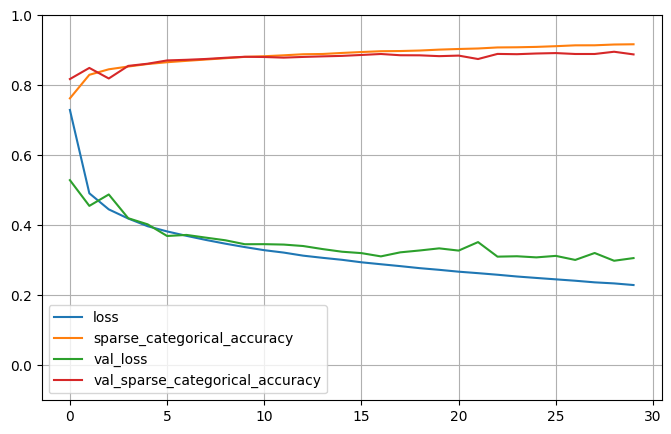

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-0.1,1)
plt.show()

In [14]:
model.evaluate(xtestFull,ytestFull)

313/313 [==============================] - 2s 4ms/step - loss: 67.6323 - sparse_categorical_accuracy: 0.8406


[67.6323471069336, 0.8406000137329102]

In [32]:
x = np.argmax(model.predict(xtestV), axis=-1)

accuracy_score(ytestV,x)

157/157 [==============================] - 0s 2ms/step


0.8962

In [15]:
from sklearn.datasets import load_wine
data = load_wine(return_X_y=True)
data[0].shape

(178, 13)

# Regressão

In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
X, y = fetch_california_housing(return_X_y=True)

In [37]:
X.shape

(20640, 8)

In [42]:
xtrainF, xtestF, ytrainF, ytestF = train_test_split(X, y, random_state=42 ,test_size=0.25)

xtrain, xvalid , ytrain , yvalid = train_test_split(xtrainF, ytrainF, random_state=42, test_size=0.25)

In [44]:
xtrain = StandardScaler().fit_transform(xtrain)
xvalid = StandardScaler().fit_transform(xvalid)
xtestF = StandardScaler().fit_transform(xtestF)

In [84]:
model = keras.models.Sequential(
    layers=[
        keras.layers.Dense(30, activation='relu', input_shape=(8,)),
        keras.layers.Dense(1)
    ]
)

In [85]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 30)                270       
                                                                 
 dense_27 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
model.compile( 
    optimizer = keras.optimizers.SGD(),
    loss      = keras.losses.mean_absolute_error )
history = model.fit( xtrain, ytrain, epochs=20, validation_data=(xvalid,yvalid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8882 - val_loss: 0.5627
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5146 - val_loss: 0.5220
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4822 - val_loss: 0.5076
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4663 - val_loss: 0.4976
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4557 - val_loss: 0.4874
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4483 - val_loss: 0.4803
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4423 - val_loss: 0.4750
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4387 - val_loss: 0.4686
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4349 - val_loss: 0.4680
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4318 - val_loss: 0.4612

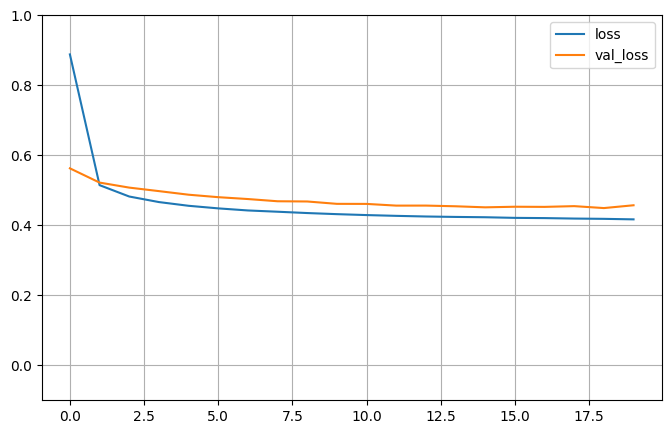

In [87]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-0.1,1)
plt.show()